Pre-import modules and setup filepaths

In [4]:
%matplotlib ipympl
import simulationlib as sl
import lasinglib as ll
import measurelib as ml

import modulators as mo
import shapes

import numpy as np
import matplotlib.pyplot as plt

import logging
import os

os.chdir(os.path.abspath(''))

logging.basicConfig()
logging.getLogger().setLevel(logging.WARNING)

Initialize simulation framework and useful constants

In [5]:
SILICON = sl.Material(diffusivity=88, emissivity=0.09, specific_heat=0.7, density=0.002329002)
CHIP = sl.SimGrid(32, 101, 0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

sim = sl.Simulation(CHIP, SILICON, duration=6, pulses=None, ambient_temp=300,
                    starting_temp=330, neumann_bc=True,
                    edge_derivative=0, sample_framerate=48, intended_pbs=1,
                    dense_logging=False, timestep_multi=1, radiation=True, progress_bar=True, silent=False)

CENTER = (CHIP.CENTERPOINT)

Create laser pulses of interest and build them into a list

In [6]:
# bp = ll.LaserPulse(CHIP, 0.5, 1, CHIP.CENTERPOINT, 6, sigma=0.3)
# seq = ll.LaserSequence([bp, bp, bp, bp], 0.5, 1)
a = ll.LaserStrobe(CHIP, 0.5, 4, CHIP.CENTERPOINT, 1, sigma=0.18, modulators=[lambda t: 1 + (t / 4) * 0.8], parameterization=shapes.genericradial( 4 * (4 * np.pi) / 3, lambda t: np.exp(t), phase=0), params=())
b = ll.LaserSequence([a], 1, 1)


In [46]:
import annealing_database as ad

In [47]:
ad.ChipRecord(name="example_database", dpath="./annealing records/example_database.dill", csvpath="./annealing records/example_database.csv")

In [48]:
test_chip = ad.DatabaseWrapper("./annealing records/example_database.dill")


In [49]:
test_chip.backup()
import time
time.sleep(7)
test_chip.write_sequence(b)
test_chip.backup()

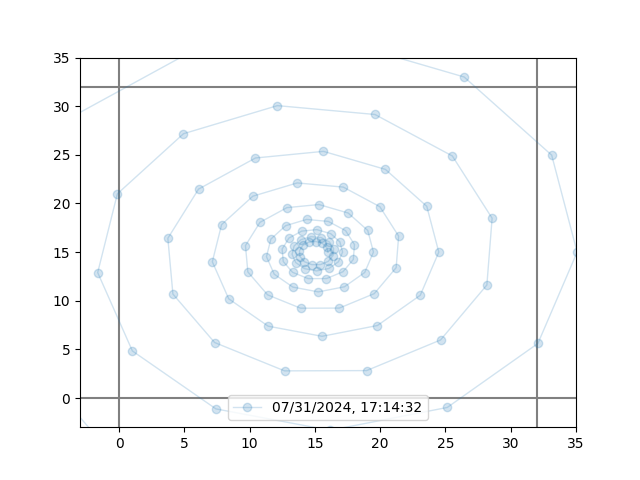

{'Backup: 07/31/2024, 17:14:25': {}, 'Backup: 07/31/2024, 17:14:32': {'4d858cad08a66b60303fe47d38af7b2b': 07/31/2024, 17:14:32
Annealing cycle: LaserSequence(['Strobe(1.000W, 1.000 + 4.000S -> 5.0001MOD)'])}}


In [50]:
# test_chip.write_sequence(b)
test_chip.visualize();
print(test_chip.load_data().backups)


Entries: {}


This database is linked to ./annealing records/example database/example_database.csv.


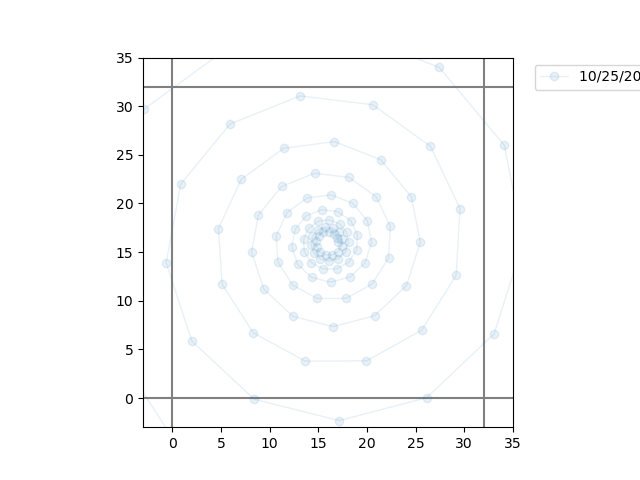

In [10]:
import annealing_database2 as adb2
example_database_path = "./annealing records/example database/example_database.dill"


example_database = adb2.DatabaseWrapper(example_database_path)
print(example_database.load_data(), end="\n\n")
print(f"Entries: {example_database.load_data().entry_data}", end="\n\n")

print(f"\nThis database is linked to {example_database.load_data().csvpath}.")
# example_database.write_sequence(b, notes="a cool spiral!")
example_database.visualize();